# <span id="top-of-notebook"></span>Pet Shelter Data Analysis

If you're viewing a preview of this notebook file on GitHub or as a binder, the links to jump to different sections within the notebook might not work.

Some sections in this notebook may not have any effect on the final analysis but are included to document steps in the process used.

**Note I remove duplicate records and columns from aac_intakes.csv and aac_outcome.csv before merging the two files on their common columns. This produces some different results than I seen in other notebooks where dupes where not removed.**

<div class="alert alert-block alert-info">
    <h2>Notebook Organization</h2>
    <ul type="a">
      <li><a href="#section_a">A. Setup and import data</a></li>
      <li><a href="#section_b">B. Initial investigatation of the data</a></li>
      <li><a href="#section_c">C. Clean the data and prepare it for analysis</a></li>
      <li><a href="#section_d">D. Analyze the data and present findings</a></li>
    </ul>
</div>

**Questions to ask before reviewing/investigating and cleaning/preparing a dataset. We should strive to understand the context behind our analysis before processing the data**

* Do I know enough about the topic of the dataset?
* Why am I working with this dataset?
* How do I plan on using the dataset?
* What questions do I need to answer?
* Who will be viewing the analysis? (For example: Should measurements be in U.S. inches or metric units)

**Assumptions Made**

* Questions about animals "in the shelter" I've interpreted as animals "that have ever been in the shelter". There doesn't seem to be enough data to determine if an animal is *currently* in the shelter.
* After reviewing a sample of the provided .csv file data, I don't think updates are needed to clean the data of the following:
    * Handle Formatting: Misspellings, extra whitespace, differences after combining multiple datasets
    * Handle Nonsensical Data: Data that does not make sense
    * Handle Saturated Data: Data that is at the extremes of the measurement
    * Handle Confidential Data: Personally identifiable information
    * Handle Individual Errors: Errors that affect a single value
    * andle Systematic Errors: Errors that affect all or large portions of the data
* Data with missing, unknown, Nan, or empty values I didn't update and don't think they effect the analysis
    * outcome_type
    * outcome_subtype
    * sex_upon_intake
    * sex_upon_outcome
    * age_upon_outcome
* Empty 'name' values replaced with 'Unknown' - I don't think this has any effect the analysis but wanted to go through the exercise.
* When computing adoption rates I'm getting the rate compare to total animal adoptions and not just the animals within the current group, such as dogs.

<div class="alert alert-block alert-info" id="section_a">
    <h2>A. Setup and import the data</h2>
</div>

In [516]:
import pandas as pd
import os

In [519]:
# Load CSV files into Pandas DataFrames
# NOTE: I'm not using aac_intakes_outcomes.csv as part of
# this project in order to demonstrate merging dataframes.

# Using os.path.join() here in case loading files on Windows
aac_i = pd.read_csv(os.path.join('data', 'aac_intakes.csv'), index_col=0)
aac_o = pd.read_csv(os.path.join('data', 'aac_outcomes.csv'), index_col=0)
# Otherwise I would load the csv files using a macOS/Linux path
# aac_i = pd.read_csv('data/aac_intakes.csv')
# aac_o = pd.read_csv('data/aac_outcomes.csv')

# NOTE: Dates could be parsed on import, but I'm using pd.to_datetime() 
# during the data cleaning phase instead
# docs: https://pandas.pydata.org/docs/reference/api/pandas.read_csv.html
# aac_o = pd.read_csv('data/aac_outcomes.csv', parse_dates=['date_of_birth', 'datetime'])

<div style="text-align: right"><a href="#top-of-notebook">Back to top</a></div>

<div class="alert alert-block alert-info" id="section_b">
    <h2>B. Initial investigatation of the data</h2>
</div>

In [3]:
# Make sure we're working with DataFrames
type(aac_i), type(aac_o)

(pandas.core.frame.DataFrame, pandas.core.frame.DataFrame)

In [4]:
# Make sure the DataFrames contain rows and columns
aac_i.shape, aac_o.shape

((80187, 12), (80681, 12))

### View the `head()` of each DataFrame

Useful for quickly testing if an object has the right type of data in it.

In [402]:
aac_i.head(1)

,age_upon_intake,animal_id,animal_type,breed,color,datetime,datetime2,found_location,intake_condition,intake_type,name,sex_upon_intake
0,8 years,A706918,Dog,English Springer Spaniel,White/Liver,2015-07-05T12:59:00.000,2015-07-05T12:59:00.000,9409 Bluegrass Dr in Austin (TX),Normal,Stray,Belle,Spayed Female


In [6]:
aac_o.head(1)

,age_upon_outcome,animal_id,animal_type,breed,color,date_of_birth,datetime,monthyear,name,outcome_subtype,outcome_type,sex_upon_outcome
0,2 weeks,A684346,Cat,Domestic Shorthair Mix,Orange Tabby,2014-07-07T00:00:00,2014-07-22T16:04:00,2014-07-22T16:04:00,NaN,Partner,Transfer,Intact Male


### View the `info()` of each DataFrame

Useful to see information about a DataFrame including the index dtype and columns, non-null values and memory usage.

In [7]:
aac_i.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80187 entries, 0 to 80186
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   age_upon_intake   80187 non-null  object
 1   animal_id         80187 non-null  object
 2   animal_type       80187 non-null  object
 3   breed             80187 non-null  object
 4   color             80187 non-null  object
 5   datetime          80187 non-null  object
 6   datetime2         80187 non-null  object
 7   found_location    80187 non-null  object
 8   intake_condition  80187 non-null  object
 9   intake_type       80187 non-null  object
 10  name              55603 non-null  object
 11  sex_upon_intake   80186 non-null  object
dtypes: object(12)
memory usage: 7.3+ MB


In [8]:
aac_o.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80681 entries, 0 to 80680
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   age_upon_outcome  80673 non-null  object
 1   animal_id         80681 non-null  object
 2   animal_type       80681 non-null  object
 3   breed             80681 non-null  object
 4   color             80681 non-null  object
 5   date_of_birth     80681 non-null  object
 6   datetime          80681 non-null  object
 7   monthyear         80681 non-null  object
 8   name              56116 non-null  object
 9   outcome_subtype   36893 non-null  object
 10  outcome_type      80667 non-null  object
 11  sex_upon_outcome  80679 non-null  object
dtypes: object(12)
memory usage: 7.4+ MB


### View the `describe()` output for each DataFrame

Useful to see generated summary statistics of a Series or Dataframe. Output will vary depending on what data is provided

In [9]:
aac_i.describe()

,age_upon_intake,animal_id,animal_type,breed,color,datetime,datetime2,found_location,intake_condition,intake_type,name,sex_upon_intake
count,80187,80187,80187,80187,80187,80187,80187,80187,80187,80187,55603,80186
unique,46,72365,5,2166,529,57055,57055,36772,8,5,14731,5
top,1 year,A721033,Dog,Domestic Shorthair Mix,Black/White,2016-09-23T12:00:00.000,2016-09-23T12:00:00.000,Austin (TX),Normal,Stray,Bella,Intact Male
freq,14672,13,45743,23519,8340,64,64,14443,70520,56280,357,25488


In [10]:
aac_o.describe()

,age_upon_outcome,animal_id,animal_type,breed,color,date_of_birth,datetime,monthyear,name,outcome_subtype,outcome_type,sex_upon_outcome
count,80673,80681,80681,80681,80681,80681,80681,80681,56116,36893,80667,80679
unique,46,72877,5,2176,532,5956,66474,66474,14824,19,9,5
top,1 year,A721033,Dog,Domestic Shorthair Mix,Black/White,2015-09-01T00:00:00,2016-04-18T00:00:00,2016-04-18T00:00:00,Bella,Partner,Adoption,Neutered Male
freq,14911,13,45856,23821,8396,112,39,39,362,20082,34232,28702


### View the length of each DataFrame

Useful to see how many records are in a DataFrame.

In [11]:
len(aac_i), len(aac_o)

(80187, 80681)

### View the `shape()` for each DataFrame

Return a tuple representing the dimensionality of a DataFrame.

In [12]:
aac_i.shape

(80187, 12)

In [13]:
aac_o.shape

(80681, 12)

### View the `dtypes()` for each DataFrame

Returns a Series with the data type of each column

In [14]:
aac_i.dtypes

age_upon_intake     object
animal_id           object
animal_type         object
breed               object
color               object
datetime            object
datetime2           object
found_location      object
intake_condition    object
intake_type         object
name                object
sex_upon_intake     object
dtype: object

In [15]:
aac_o.dtypes

age_upon_outcome    object
animal_id           object
animal_type         object
breed               object
color               object
date_of_birth       object
datetime            object
monthyear           object
name                object
outcome_subtype     object
outcome_type        object
sex_upon_outcome    object
dtype: object

<div style="text-align: right"><a href="#top-of-notebook">Back to top</a></div>

<div class="alert alert-block alert-info" id="section_c">
    <h2>C. Clean the data and prepare it for analysis</h2>
    <p>Data Cleaning is the process of fixing any errors or mistakes in a dataset.</p>
    <p>Look for bad data types. REF: <a href="https://teamtreehouse.com/library/preparing-data-for-analysis">https://teamtreehouse.com/library/preparing-data-for-analysis</a></p>
</div>

### **Handle Duplicates**: Repeated data

NOTE: pandas dataFrame constructor will automatically rename any columns with duplicate labels.

[drop_duplicate() docs](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.drop_duplicates.html)


#### Remove rows with duplicate values

In [16]:
# By default, drop_duplicates() removes duplicate rows based on all columns.
# Here I'm keeping the first occurrence.
# NOTE: I'm not sure 'first' or 'last' really matters since they are duplicates.
aac_i_deduped = aac_i.drop_duplicates(keep='first')
aac_o_deduped = aac_o.drop_duplicates(keep='first')

#### Remove columns with duplicate values

<div class="alert alert-block alert-danger">
    <strong>NOTE: Checking for columns that have duplicate values takes a minute to run and makes my computer fan come on. Maybe too intensive if data set gets any bigger.

It might be better to just eyeball the `describe()`, or `head()` inspection to check for potential duplicates.</strong>
</div>

The `T` property here transforms the columns into rows and the rows into columns by using the `transpose()` method ([reference](https://pandas.pydata.org/pandas-docs/version/0.25.0/reference/api/pandas.DataFrame.T.html)).

In [17]:
aac_i_deduped = aac_i_deduped.T.drop_duplicates().T
aac_o_deduped = aac_o_deduped.T.drop_duplicates().T

In [18]:
# Check data shape before and after
print(f'''
RESULTS AFTER REMOVING DUPLICATES
\nintake columns removed: {aac_i.columns.difference(aac_i_deduped.columns)}
outcomes columns removed: {aac_o.columns.difference(aac_o_deduped.columns)}
\naac_i shape before: {aac_i.shape}
aac_i_deduped shape: {aac_i_deduped.shape}
\naac_o shape before: {aac_o.shape}
aac_o_deduped shape: {aac_o_deduped.shape}''')


RESULTS AFTER REMOVING DUPLICATES

intake columns removed: Index(['datetime2'], dtype='object')
outcomes columns removed: Index(['monthyear'], dtype='object')

aac_i shape before: (80187, 12)
aac_i_deduped shape: (80161, 11)

aac_o shape before: (80681, 12)
aac_o_deduped shape: (80671, 11)


### **Combine the two DataFrames**

Create a new dataset by using the `DataFrame.merge` method.

Docs: <https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.merge.html>

In [19]:
# Here I'm calling merge on the `aac_i_deduped` dataframe, so it's considered to be the left side.
# `aac_o_deduped` is the right side.
# I'm using 'name', 'animal_id', 'animal_type', 'breed', 'color' columns for the join since those are in both dataframes.
# I'm also adding '_intake', '_outcome' suffixes to resolve any column name collisions.
combined_deduped_data = aac_i_deduped.merge(
    aac_o_deduped,
    left_on=['name', 'animal_id', 'animal_type', 'breed', 'color'],
    right_on=['name', 'animal_id', 'animal_type', 'breed', 'color'],
    suffixes=('_intake', '_outcome')
)
# combined_data.head(1)
# combined_deduped_data.shape

### **Handle Formatting**: Misspellings, extra whitespace, differences after combining multiple datasets

<div class="alert alert-block alert-warning">
    <p><strong>Handle Formatting Results</strong><p>
    <p>I manually reviewed a sample of .csv file and did not notice any obvious misspelling, whitespace. <strong>Note some breed names, pet names, and street names may appear as misspelled words</strong>, for example:</p>
    <ul>
        <li>'Tortie' is sometimes used to indicate tortoiseshell cat color.</li>
        <li>Names that might potentially need correcting:
            <ul>
                <li>"Catahoula/Plott Hound"v
                <li>"Wirehaired"</li>
                <li>"Cane Corso Mix"</li>
                <li>"Doberman Pinsch Mix"</li>
                <li>"Catahoula"</li>
                <li>"Bichon Frise Mix"</li>
                <li>"Chinese Sharpei"</li>
                <li>"Interparke Dr"</li>
                <li>"Landseer Mix"</li>
                <li>"Belgian Malinois Mix"</li>
                <li>"Tonkinese Mix"</li>
                <li>"Dandie Dinmont Mix"</li>
            </ul>
        </li>
    </ul>
</div>

### **Handle Missing Data**: Data labeled as unknown, Nan, or empty

In [20]:
# Get a quick overview of how many blank values we have by using `DataFrame.count()`
combined_deduped_data.count()

age_upon_intake     100096
animal_id           100096
animal_type         100096
breed               100096
color               100096
datetime_intake     100096
found_location      100096
intake_condition    100096
intake_type         100096
name                 75148
sex_upon_intake     100095
age_upon_outcome    100093
date_of_birth       100096
datetime_outcome    100096
outcome_subtype      39677
outcome_type        100080
sex_upon_outcome    100094
dtype: int64

In [21]:
# The 'name' column looks like it's missing a bunch of values.
# View a few records where the name is missing
combined_deduped_data[combined_deduped_data.name.isna()].head()

,age_upon_intake,animal_id,animal_type,breed,color,datetime_intake,found_location,intake_condition,intake_type,name,sex_upon_intake,age_upon_outcome,date_of_birth,datetime_outcome,outcome_subtype,outcome_type,sex_upon_outcome
2,4 weeks,A665644,Cat,Domestic Shorthair Mix,Calico,2013-10-21T07:59:00.000,Austin (TX),Sick,Stray,NaN,Intact Female,4 weeks,2013-09-21T00:00:00,2013-10-21T11:39:00,Partner,Transfer,Intact Female
10,2 years,A760053,Dog,Chihuahua Shorthair,White/Tan,2017-10-11T15:46:00.000,8800 South First Street in Austin (TX),Normal,Stray,NaN,Intact Male,2 years,2015-10-11T00:00:00,2017-10-15T18:30:00,NaN,Adoption,Neutered Male
13,2 years,A743114,Cat,Domestic Shorthair Mix,Black/White,2017-02-04T10:10:00.000,208 Beaver St in Austin (TX),Injured,Stray,NaN,Intact Female,2 years,2015-02-04T00:00:00,2017-02-04T10:48:00,Suffering,Euthanasia,Intact Female
18,2 months,A697950,Dog,Australian Cattle Dog/Labrador Retriever,Tan/White,2015-03-04T11:22:00.000,1501 S Fm 973 in Austin (TX),Normal,Stray,NaN,Intact Female,2 months,2014-12-20T00:00:00,2015-03-08T18:55:00,NaN,Adoption,Spayed Female
21,5 months,A682230,Dog,Maltese Mix,White,2014-06-25T16:27:00.000,3737 Keats Dr in Austin (TX),Normal,Stray,NaN,Intact Female,6 months,2013-12-25T00:00:00,2014-06-29T17:26:00,Partner,Transfer,Spayed Female


In [22]:
# Replace NaN values in the name column with 'Unknown'
# Using .loc or .iloc here to be more explicit creates errors
combined_deduped_data['name'] = combined_deduped_data['name'].fillna('Unknown')

In [23]:
# Run DataFrame.count()` again and check the name column values are no longer NaN
combined_deduped_data.count()

age_upon_intake     100096
animal_id           100096
animal_type         100096
breed               100096
color               100096
datetime_intake     100096
found_location      100096
intake_condition    100096
intake_type         100096
name                100096
sex_upon_intake     100095
age_upon_outcome    100093
date_of_birth       100096
datetime_outcome    100096
outcome_subtype      39677
outcome_type        100080
sex_upon_outcome    100094
dtype: int64

### **Handle Type Issues**: Data that is a different type than expected

#### Convert date arguments to `datetime` dtype

In [24]:
# Review dtypes and note which look like they should be datetimes
combined_deduped_data.dtypes

age_upon_intake     object
animal_id           object
animal_type         object
breed               object
color               object
datetime_intake     object
found_location      object
intake_condition    object
intake_type         object
name                object
sex_upon_intake     object
age_upon_outcome    object
date_of_birth       object
datetime_outcome    object
outcome_subtype     object
outcome_type        object
sex_upon_outcome    object
dtype: object

In [25]:
# Note I'm not using .loc or .iloc here because it creates errors
combined_deduped_data['datetime_intake'] = pd.to_datetime(combined_deduped_data['datetime_intake'])
combined_deduped_data['date_of_birth'] = pd.to_datetime(combined_deduped_data['date_of_birth'])
combined_deduped_data['datetime_outcome'] = pd.to_datetime(combined_deduped_data['datetime_outcome'])
# Verify column dtypes were updated
combined_deduped_data.dtypes

age_upon_intake             object
animal_id                   object
animal_type                 object
breed                       object
color                       object
datetime_intake     datetime64[ns]
found_location              object
intake_condition            object
intake_type                 object
name                        object
sex_upon_intake             object
age_upon_outcome            object
date_of_birth       datetime64[ns]
datetime_outcome    datetime64[ns]
outcome_subtype             object
outcome_type                object
sex_upon_outcome            object
dtype: object

In [26]:
# NOTE: describe() shows a warning about datetime, but also includes some datetime stats
# combined_deduped_data.describe()
#
# Using datetime_is_numeric=True shows 'min' and 'max' for dates instead of 'first' and 'last'
# ***By default, describe(datetime_is_numeric=True) will only do an analysis of numeric columns if they exist.***
# combined_deduped_data.describe(datetime_is_numeric=True)
#
# Using include='all' will include a union of attributes of each type
# Docs: https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.describe.html
# combined_deduped_data.describe(datetime_is_numeric=True, include='all')
#
# Could also use describe on a Series (column) to get more focused stats.
# combined_deduped_data['datetime_intake'].describe(datetime_is_numeric=True)

<div class="alert alert-block alert-warning">
    <strong>Handle Type Issues Results
    <ul>
        <li>Column types with 'date' in the names and values that look like they should be `datetime` have been updated.</li>
        </ul>
    </strong>
</div>

### **Handle Nonsensical Data**: Data that does not make sense

<div class="alert alert-block alert-warning">
After reviewing sample data from the .csv files I don't think updates are needed for nonsensical data.
</div>

### **Handle Saturated Data**: Data that is at the extremes of the measurement

<div class="alert alert-block alert-warning">
After reviewing sample data from the .csv files I don't think updates are needed for saturated data.
</div>

### **Handle Confidential Data**: Personally identifiable information

Further PII Resources:

* [DOL PII](https://www.dol.gov/general/ppii)<br>
* [EU GDPR](https://gdpr.eu/eu-gdpr-personal-data/)

<div class="alert alert-block alert-warning">
After reviewing sample data from the .csv files I don't think updates are needed for confidential data.
</div>

### **Handle Individual Errors**: Errors that affect a single value

<div class="alert alert-block alert-warning">
After reviewing sample data from the .csv files I don't think updates are needed for individual errors.
</div>

### **Handle Systematic Errors**: Errors that affect all or large portions of the data

<div class="alert alert-block alert-warning">
After reviewing sample data from the .csv files I don't think updates are needed for systematic errors.
</div>

### **Create Additional Columns for Analysis**

Here I'm creating columns for 'datetime_intake_year', 'datetime_intake_month', and 'intake_year_month' to make selecting records by year and month value easier.

In [27]:
# Note I'm not using .loc or .iloc here because it creates errors
combined_deduped_data['datetime_intake_year'] = combined_deduped_data['datetime_intake'].dt.year
# Alternate way to create year column, if ever needed for some reason
# combined_deduped_data['datetime_intake_year'] = pd.DatetimeIndex(combined_deduped_data['datetime_intake']).year
combined_deduped_data['datetime_intake_month'] = combined_deduped_data['datetime_intake'].dt.month
combined_deduped_data['intake_year_month'] = pd.to_datetime(combined_deduped_data['datetime_intake']).dt.to_period('M')
# Check the result
combined_deduped_data.head()

,age_upon_intake,animal_id,animal_type,breed,color,datetime_intake,found_location,intake_condition,intake_type,name,sex_upon_intake,age_upon_outcome,date_of_birth,datetime_outcome,outcome_subtype,outcome_type,sex_upon_outcome,datetime_intake_year,datetime_intake_month,intake_year_month
0,8 years,A706918,Dog,English Springer Spaniel,White/Liver,2015-07-05 12:59:00,9409 Bluegrass Dr in Austin (TX),Normal,Stray,Belle,Spayed Female,8 years,2007-07-05,2015-07-05 15:13:00,NaN,Return to Owner,Spayed Female,2015,7,2015-07
1,11 months,A724273,Dog,Basenji Mix,Sable/White,2016-04-14 18:43:00,2818 Palomino Trail in Austin (TX),Normal,Stray,Runster,Intact Male,1 year,2015-04-17,2016-04-21 17:17:00,NaN,Return to Owner,Neutered Male,2016,4,2016-04
2,4 weeks,A665644,Cat,Domestic Shorthair Mix,Calico,2013-10-21 07:59:00,Austin (TX),Sick,Stray,Unknown,Intact Female,4 weeks,2013-09-21,2013-10-21 11:39:00,Partner,Transfer,Intact Female,2013,10,2013-10
3,4 years,A682524,Dog,Doberman Pinsch/Australian Cattle Dog,Tan/Gray,2014-06-29 10:38:00,800 Grove Blvd in Austin (TX),Normal,Stray,Rio,Neutered Male,4 years,2010-06-29,2014-07-02 14:16:00,NaN,Return to Owner,Neutered Male,2014,6,2014-06
4,2 years,A743852,Dog,Labrador Retriever Mix,Chocolate,2017-02-18 12:46:00,Austin (TX),Normal,Owner Surrender,Odin,Neutered Male,2 years,2015-02-18,2017-02-21 17:44:00,NaN,Return to Owner,Neutered Male,2017,2,2017-02


<div style="text-align: right"><a href="#top-of-notebook">Back to top</a></div>

---

<div class="alert alert-block alert-info" id="section_d">
    <h2>D. Analyze the data and present findings</h2>
</div>

#### Questions

---

#### 1. Is there an area where more pets are found?

Find the top 5 places where animals are found so the shelter can coordinate with local volunteers and animal control to monitor these areas.

Hint: Try to group the found locations together.

In [378]:
# Group by the found_location values, get size of each location, then sort by the size values.
# head() will return top values 5 by default.
q1_result = combined_deduped_data.groupby('found_location').size().sort_values(ascending=False).head()
#
# NOTE: describe() also shows the `top` value for `found_location` 
# and the number of times the value occurs as `freq`.
# combined_deduped_data.describe(datetime_is_numeric=True, include='all')
#
print(f"FINAL ANSWER:\n{q1_result}\n\nThe area where more pets are found is '{q1_result.index[0]}'")

FINAL ANSWER:
found_location
Austin (TX)                          20075
Outside Jurisdiction                  1595
Travis (TX)                           1168
7201 Levander Loop in Austin (TX)      605
Del Valle (TX)                         512
dtype: int64

The area where more pets are found is 'Austin (TX)'


#### 2. What is the average number of pets found in a month in the year 2015? Are there months when a higher number of animals are found?

Knowing the number of pets the shelter might see in a month can help them gather enough resources and donations to care for the animals they receive.

In [472]:
# Create a boolean series using a vectorized comparison.
# This will be used to select a subset of the data.
year_2015_index = combined_deduped_data.datetime_intake_year == 2015
# To check result uncomment next line
# year_2015_index.head()

# Using the boolean series to retrieve all rows where that comparison was True.
# To check result uncomment next line and comment out any below it.
# Check that all the datetime_intake and datetime_intake_year 
# values are for 2015
# combined_deduped_data[year_2015_index].head()

# Now - group the 2015 intakes by month
# Using .loc here to make the statement a little more explicit
monthly_2015 = combined_deduped_data.loc[year_2015_index].groupby('datetime_intake_month').size().sort_values(ascending=False)

# Get the average per month in 2015
q2_result = monthly_2015.mean()

print(f'''{monthly_2015}
\nFINAL ANSWER:
2015 monthly average: {q2_result}.
June (6) and May (5) are months when highest number of animals are found.''')

datetime_intake_month
6     2650
5     2605
10    2137
8     2083
7     2028
9     1963
4     1940
11    1861
3     1697
12    1555
1     1552
2     1467
dtype: int64

FINAL ANSWER:
2015 monthly average: 1961.5.
June (6) and May (5) are months when highest number of animals are found.


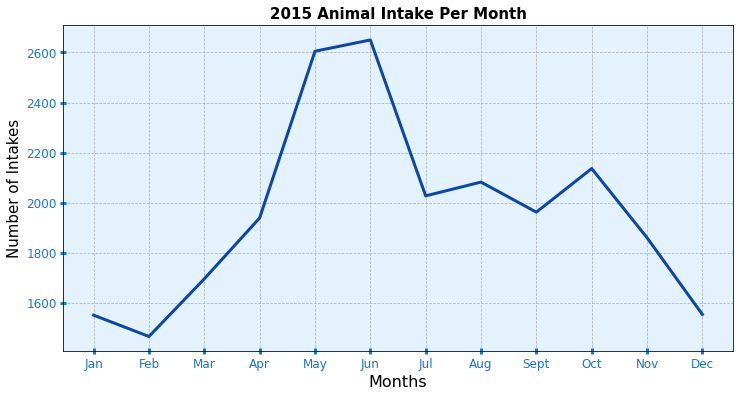

In [359]:
# Plot the findings to make the months with higher and lower intakes more obvious.
chrt = monthly_2015.plot(kind='line', figsize=(12, 6), color="#0d47a1", use_index=True, lw=3)
chrt.set_title('2015 Animal Intake Per Month', fontsize=15, fontweight="bold")
chrt.set_xlabel('Months', fontsize=16)
chrt.set_ylabel('Number of Intakes', fontsize=15)
chrt.set_xticks([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]) # Need to avoid FixedFormatter warning
xlabels = ["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sept", "Oct", "Nov", "Dec"]
chrt.set_xticklabels(xlabels)
chrt.tick_params(colors='#1976d2', which='both', direction='inout', length=6, width="3", labelsize="12")
chrt.grid(True, ls="dashed", lw=".75")
chrt.set_facecolor('#e3f2fd')

#### 3. What is the ratio of incoming pets vs. adopted pets?

This key metric helps the shelter know how they are doing.

In [495]:
# To get the ratio (percentage) divide the total number of intakes by the total number of adoptions

# Reference defining Rates and Ratios:
# https://www.varsitytutors.com/hotmath/hotmath_help/topics/rates-ratios
# A ratio is a comparison of two numbers. A ratio can be written using a colon, 3:5, or as a fraction.
# A rate, by contrast, is a comparison of two quantities which can have different units. 
# For example 5 miles per 3 hours is a rate, as is 34 dollars per square foot.

# All the animals are intakes, so use the length of the entire dataset
number_of_intakes = len(combined_deduped_data)

# Use an inline boolean Series to select the animals with Adoption outcomes and get the length
number_of_adoptions = len(combined_deduped_data.loc[combined_deduped_data.outcome_type == "Adoption"])

# Calculate the ratio
ratio_incoming_vs_adopted = number_of_adoptions / number_of_intakes

print(f'''FINAL ANSWER:
The ratio of pet adoptions to total pets is {number_of_adoptions} : {number_of_intakes}, or roughly 43 in 100.
The rate is {number_of_adoptions} pet adoptions per {number_of_intakes} pets, or {round(ratio_incoming_vs_adopted * 100)}%''')

FINAL ANSWER:
The ratio of pet adoptions to total pets is 43254 : 100096, or roughly 43 in 100.
The rate is 43254 pet adoptions per 100096 pets, or 43%


#### 4. What is the distribution of the types of animals in the shelter?

Find the count of each type of animal in the shelter.

In [32]:
# Group by animal_type and sort the values
q4_result = combined_deduped_data.groupby('animal_type').size().sort_values(ascending=False)
print(f"FINAL ANSWER:\n{q4_result}")
#
# NOTE: describe() also shows the number of `unique` `animal_type` values
# and the `top` value of `Dog` with a `freq` value which match the findings.
# combined_deduped_data.describe(datetime_is_numeric=True, include='all')
#

FINAL ANSWER:
animal_type
Dog          63054
Cat          32246
Other         4447
Bird           340
Livestock        9
dtype: int64


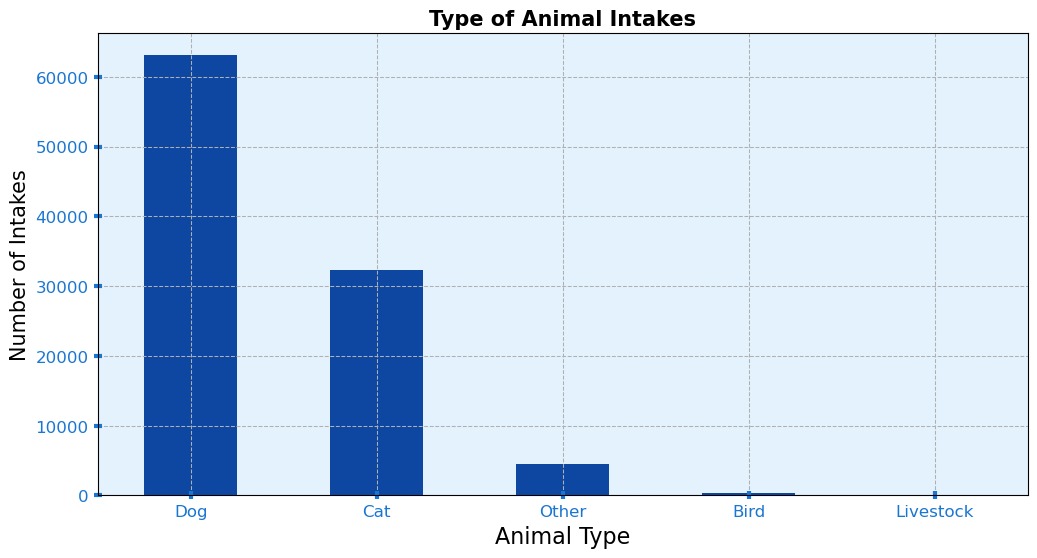

In [33]:
# Plot the findings to make them more obvious
chrt = q4_result.plot(kind='bar', figsize=(12, 6), color="#0d47a1", use_index=True, lw=3, rot=False, picker=True)
chrt.set_title('Type of Animal Intakes', fontsize=15, fontweight="bold")
chrt.set_xlabel('Animal Type', fontsize=16)
chrt.set_ylabel('Number of Intakes', fontsize=15)
chrt.tick_params(colors='#1976d2', which='both', direction='inout', length=6, width="3", labelsize="12")
chrt.grid(True, ls="dashed", lw=".75")
chrt.set_facecolor('#e3f2fd')

#### 5. What are the adoption rates for specific breeds?

Find the top 5 dog breeds in the shelter (based on count) and then find the adoption percentage of each breed.

In [496]:
# Note adopted_animals was defined previously

# Get total number of adopted pets to use in calculating rate
total_adopted_animals = len(adopted_animals)

# Create a new DataFrame of just adopted dogs
adopted_dogs = adopted_animals.loc[adopted_animals.animal_type == "Dog"]

# Check the results so far, make sure animal_type is Dog and outcome_type is Adoption
# adopted_dogs.head(20)

# Group adopted dogs by breed and get the top 5
top_5_adopted_dog_breeds = adopted_dogs.groupby('breed').size().sort_values(ascending=False).head(5)
# Note this returns a Series
# type(top_5_adopted_dog_breeds)

# Create a DataFrame from the Series and give it a default index column
top_5_adopted_dog_breeds_df = pd.DataFrame(top_5_adopted_dog_breeds).reset_index()

# Rename the column labels
top_5_adopted_dog_breeds_df.columns =['adopted_dog_breed_names', 'number_of_adoptions']

# Add a column with the calculated adoption rate of the breed
# Adoption rate is a percentage of adoptions for the breed compared to overall animal adoptions
top_5_adopted_dog_breeds_df['adoption_rate'] = round(top_5_adopted_dog_breeds_df.number_of_adoptions.mul(100) / total_adopted_animals, 2)

# Add a column with the calculated adoption ratio of the breed
top_5_adopted_dog_breeds_df['adoption_ratio_per_total_adoptions'] = top_5_adopted_dog_breeds_df.number_of_adoptions.map(str) + ' : ' + f'{total_adopted_animals}'

print(f"FINAL ANSWER:")
top_5_adopted_dog_breeds_df

FINAL ANSWER:


,adopted_dog_breed_names,number_of_adoptions,adoption_rate,adoption_ratio_per_total_adoptions
0,Pit Bull Mix,3710,8.58,3710 : 43254
1,Labrador Retriever Mix,3160,7.31,3160 : 43254
2,Chihuahua Shorthair Mix,2781,6.43,2781 : 43254
3,German Shepherd Mix,1323,3.06,1323 : 43254
4,Australian Cattle Dog Mix,822,1.90,822 : 43254


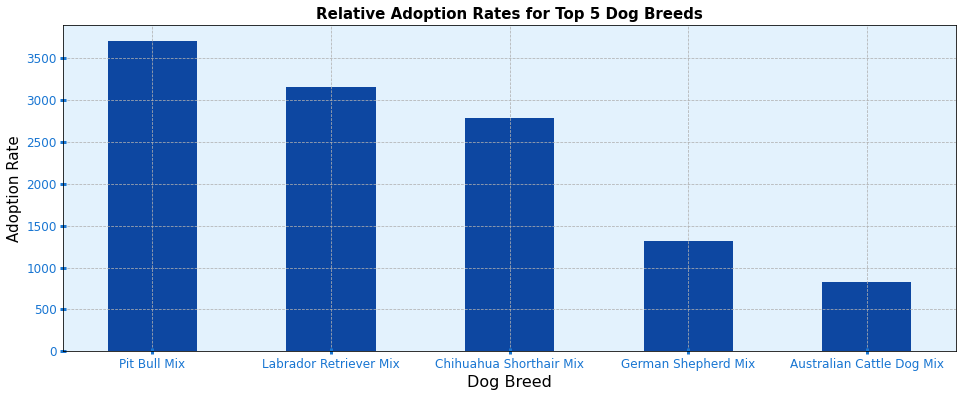

In [474]:
# Plot the findings to make them more obvious
chrt = top_5_adopted_dog_breeds.plot(kind='bar', figsize=(16, 6), color="#0d47a1", use_index=True, lw=3, rot=False, picker=True)
chrt.set_title('Relative Adoption Rates for Top 5 Dog Breeds', fontsize=15, fontweight="bold")
chrt.set_xlabel('Dog Breed', fontsize=16)
chrt.set_ylabel('Adoption Rate', fontsize=15)
chrt.tick_params(colors='#1976d2', which='both', direction='inout', length=6, width="3", labelsize="12")
chrt.grid(True, ls="dashed", lw=".75")
chrt.set_facecolor('#e3f2fd')

---

#### 6. What are the adoption rates for different colorings?

Find the top 5 colorings in the shelter (based on count) and then find the adoption percentage of each color.

In [477]:
# Note adopted_animals and total_adopted_animals was defined previously

# Group colorings and get the top 5
top_5_colors = adopted_animals.groupby('color').size().sort_values(ascending=False).head(5)

# Create a DataFrame from the Series and give it a default index column
top_5_colors_df = pd.DataFrame(top_5_colors).reset_index()

# Rename the column labels
top_5_colors_df.columns =['color', 'number_of_adoptions']

# Add a column with the calculated adoption rate of the breed
# Adoption rate is a percentage of adoptions for the breed compared to overall animal adoptions
top_5_colors_df['adoption_rate'] = round(top_5_colors_df['number_of_adoptions'].mul(100) / total_adopted_animals, 2)

# Add a column with the calculated adoption ratio of the breed
top_5_colors_df['adoption_ratio_per_total_adoptions'] = top_5_colors_df.number_of_adoptions.map(str) + ' : ' + f'{total_adopted_animals}'

print(f"FINAL ANSWER:")
top_5_colors_df

FINAL ANSWER:


,color,number_of_adoptions,adoption_rate,adoption_ratio_per_total_adoptions
0,Black/White,4980,11.51,4980 : 43254
1,Black,3229,7.47,3229 : 43254
2,Brown Tabby,2116,4.89,2116 : 43254
3,Tan/White,1638,3.79,1638 : 43254
4,Brown/White,1577,3.65,1577 : 43254


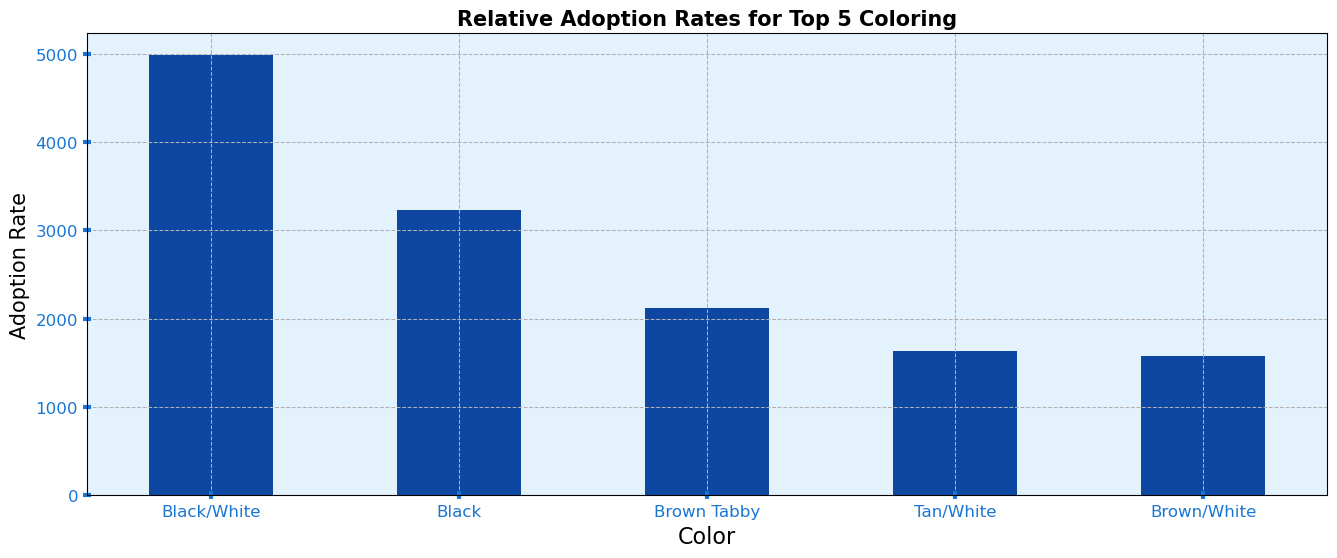

In [37]:
# Plot the findings to make them more obvious
chrt = top_5_colors.plot(kind='bar', figsize=(16, 6), color="#0d47a1", use_index=True, lw=3, rot=False, picker=True)
chrt.set_title('Relative Adoption Rates for Top 5 Coloring', fontsize=15, fontweight="bold")
chrt.set_xlabel('Color', fontsize=16)
chrt.set_ylabel('Adoption Rate', fontsize=15)
chrt.tick_params(colors='#1976d2', which='both', direction='inout', length=6, width="3", labelsize="12")
chrt.grid(True, ls="dashed", lw=".75")
chrt.set_facecolor('#e3f2fd')

---

#### 7. About how many animals are spayed/neutered each month?

This will help the shelter allocate resources and staff. Assume that all intact males and females will be spayed/neutered.

In [491]:
# Select all animals with `intact` in their `sex_upon_intake` value
# Docs for str.contains(): https://pandas.pydata.org/docs/reference/api/pandas.Series.str.contains.html
intact_intake_animals = combined_deduped_data.loc[combined_deduped_data['sex_upon_intake'].str.contains('Intact', case=False, na=False)]
# Check the type
# type(intact_intake_animals)
# Check the result
# intact_intake_animals.head()

q7_result = grouped_by_year_and_month = intact_intake_animals.groupby('intake_year_month').size()

print(f"FINAL ANSWER:\n{q7_result}")

print("\nInteresting table solution found:")
# Ref: https://github.com/hkvenner/pet-shelter-analysis/blob/main/pet_shelter_analysis.ipynb
table_df = pd.pivot_table(intact_intake_animals, values='animal_id', index=['datetime_intake_month'],
                    columns=['datetime_intake_year'], aggfunc='count')
#Finds the average number of intakes per month over the years
table_df['Average'] = table_df.mean(axis = 1)
# Rename the months with month names instead of numbers
table_df = table_df.rename(index={1: 'January', 2: 'February', 3: 'March', 4: 'April', 5: 'May', 6: 'June'})
table_df = table_df.rename(index={7: 'July', 8: 'August', 9: 'September', 10: 'October', 11: 'November', 12: 'December'})
table_df.round()

FINAL ANSWER:
intake_year_month
2013-10    1191
2013-11     933
2013-12     864
2014-01     882
2014-02     780
2014-03     915
2014-04    1063
2014-05    1521
2014-06    1335
2014-07    1452
2014-08    1229
2014-09    1263
2014-10    1147
2014-11     998
2014-12     878
2015-01     831
2015-02     724
2015-03     814
2015-04     911
2015-05    1446
2015-06    1616
2015-07    1153
2015-08    1163
2015-09    1104
2015-10    1193
2015-11     996
2015-12     757
2016-01     819
2016-02     780
2016-03     812
2016-04     989
2016-05    1436
2016-06    1198
2016-07    1018
2016-08    1204
2016-09    1071
2016-10     933
2016-11    1011
2016-12     947
2017-01     827
2017-02     783
2017-03     830
2017-04    1017
2017-05    1365
2017-06    1397
2017-07    1152
2017-08    1034
2017-09    1209
2017-10     956
2017-11     804
2017-12     728
2018-01     746
2018-02     643
2018-03     490
Freq: M, dtype: int64

Interesting table solution found:


datetime_intake_year,2013,2014,2015,2016,2017,2018,Average
datetime_intake_month,,,,,,,
January,NaN,882.0,831.0,819.0,827.0,746.0,821.0
February,NaN,780.0,724.0,780.0,783.0,643.0,742.0
March,NaN,915.0,814.0,812.0,830.0,490.0,772.0
April,NaN,1063.0,911.0,989.0,1017.0,NaN,995.0
May,NaN,1521.0,1446.0,1436.0,1365.0,NaN,1442.0
June,NaN,1335.0,1616.0,1198.0,1397.0,NaN,1386.0
July,NaN,1452.0,1153.0,1018.0,1152.0,NaN,1194.0
August,NaN,1229.0,1163.0,1204.0,1034.0,NaN,1158.0
September,NaN,1263.0,1104.0,1071.0,1209.0,NaN,1162.0


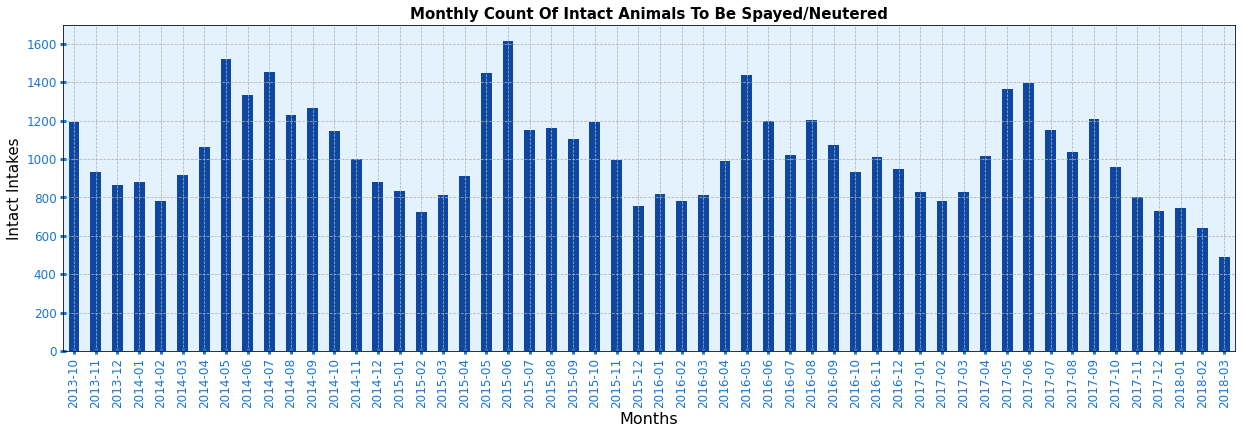

In [521]:
# Plot the findings to make them more obvious
chrt = q7_result.plot(kind='bar', figsize=(21, 6), color="#0d47a1", use_index=True, lw=3, picker=True)
chrt.set_title('Monthly Count Of Intact Animals To Be Spayed/Neutered', fontsize=15, fontweight="bold")
chrt.set_xlabel('Months', fontsize=16)
chrt.set_ylabel('Intact Intakes', fontsize=15)
chrt.tick_params(colors='#1976d2', which='both', direction='inout', length=6, width="3", labelsize="12")
chrt.grid(True, ls="dashed", lw=".75")
chrt.set_facecolor('#e3f2fd')

<div style="text-align: right"><a href="#top-of-notebook">Back to top</a></div>

---

### Solutions for Exceeds Rating

---

#### 1. How many animals in the shelter are repeats? Which animal was returned to the shelter the most?

This means the animal has been brought in more than once.

In [494]:
#
# NOTE: describe() also shows the `top` value for `animal_id` 
# and number of times the value occurs as `freq`.
# combined_deduped_data.describe(datetime_is_numeric=True, include='all')
#

# Sanity check total number of records exceeds total number of unique animal IDs
total_animal_intakes = len(combined_deduped_data)
unique_ids = combined_deduped_data.animal_id.nunique()
print(f"Total number of intakes: {total_animal_intakes}")
print(f"Total number of unique id's: {unique_ids}")
print(f"Looks like we have {total_animal_intakes - unique_ids} repeats.")

# Get repeats using groupby
repeats = combined_deduped_data.groupby(['animal_id']).size().sort_values(ascending=False).head(5)
# Alternate way to get repeats using a pivot table
# repeats = combined_deduped_data.pivot_table(columns=['animal_id'], aggfunc='size').sort_values(ascending=False).head(5)
# print(f"\n{repeats}")

# I can also confirm the highest value by accessing a third way.
# Note the value_counts() method returns a Series containing counts of unique values
# in descending order so that the first element is the most frequently-occurring.
# Docs: https://pandas.pydata.org/docs/reference/api/pandas.Series.value_counts.html
highest_number_of_visits = combined_deduped_data.animal_id.value_counts().iloc[0]
print(f"\nThe highest number of visits is: {highest_number_of_visits}")

# Get the #1 most repeated animal (at index[0])
most_repeated_animal_id = repeats.index[0]
# Get the row for the most repeated animal
most_repeated_animal = combined_deduped_data.loc[combined_deduped_data['animal_id'] == most_repeated_animal_id]

print(f"\nFINAL ANSWER:\n{total_animal_intakes - unique_ids} animals are repeat visitors to the shelter.")
print(f'''The animal that most returned to the shelter is:
      \tanimal_id: {most_repeated_animal_id}
      \tname: "{most_repeated_animal['name'].iloc[0]}"
      \tnumber of visits: {highest_number_of_visits}''')

Total number of intakes: 100096
Total number of unique id's: 71924
Looks like we have 28172 repeats.

The highest number of visits is: 169

FINAL ANSWER:
28172 animals are repeat visitors to the shelter.
The animal that most returned to the shelter is:
      	animal_id: A721033
      	name: "Lil Bit"
      	number of visits: 169


---

#### 2. What are the adoption rates for the following age groups?

* baby: 4 months and less
* young: 5 months - 2 years
* adult: 3 years - 10 years
* senior: 11+ years

In [510]:
# Function to covert an age string to a year float
def convert_intake_age_to_years(age):
    """Function to convert intake age string to a year value"""
    # Split age, such as '4 weeks' into two values, like ['4', 'weeks']
    age_split = age.split(' ')
    # Get the first value, and convert it to an integer
    numerator = int(age_split[0])
    # Test if the second value.
    # This will catch both plural and singular values,
    # like 'day' and 'days' and convert to years.
    if age_split[1].startswith('day'):
        return numerator / 365
    elif age_split[1].startswith('week'):
        return numerator / 52
    elif age_split[1].startswith('month'):
        return numerator / 12
    elif age_split[1].startswith('year'):
        return numerator
    else:
        # If we get here, we have an unexpected value.
        # Could just return 0 instead of raising an error, perhaps.
        raise ValueError(f"Unexpected value: {age_split[1]}")

# Use a boolean Series to select the animals with Adoption outcomes and creat a new DataFrame
# TODO: Try to re-use adopted_animals defined in question 5
all_adopted_animals = combined_deduped_data.loc[combined_deduped_data.outcome_type == "Adoption"].copy()
# Check the results
# all_adopted_animals.head()

# In the new DataFrame, create a new column named 'intake_age_in_years' and use apply()
# to populate it with the value returned from convert_intake_age_to_years()
# apply() doc: https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.apply.html
# Alternatively could look at using .map() or .applymap() perhaps
all_adopted_animals['intake_age_in_years'] = all_adopted_animals.age_upon_intake.apply(convert_intake_age_to_years)
# all_adopted_animals['intake_age_in_years'] = all_adopted_animals['age_upon_intake']
# all_adopted_animals['intake_age_in_years'] = res(all_adopted_animals['age_upon_intake'])
# Round the decimals to 4 places, so we know what we're working with
all_adopted_animals['intake_age_in_years'] = all_adopted_animals.intake_age_in_years.round(decimals = 4)
# Check the result
# type(all_adopted_animals)
# all_adopted_animals.head(10)
# Notice all outcome_type values are Adoption and
# intake_age_in_years is a float with 4 decimals

#
# Second attempt - I read using a np.select() would be faster than using an apply() but
# couldn't figure out how to get this to add a column to my all_adopted_animals df right off.
# I'm keeping this dead code in case I might give it another try in the future.

# import numpy as np

# conditions = [
#     all_adopted_animals['age_upon_intake'].str.split(expand=True)[1].str.startswith('day'),
#     all_adopted_animals['age_upon_intake'].str.split(expand=True)[1].str.startswith('week'),
#     all_adopted_animals['age_upon_intake'].str.split(expand=True)[1].str.startswith('month'),
#     all_adopted_animals['age_upon_intake'].str.split(expand=True)[1].str.startswith('year'),
# ]

# outputs = [
#     all_adopted_animals['age_upon_intake'].str.split(expand=True)[0].astype(int) / 365,
#     all_adopted_animals['age_upon_intake'].str.split(expand=True)[0].astype(int) / 52,
#     all_adopted_animals['age_upon_intake'].str.split(expand=True)[0].astype(int) / 12,
#     all_adopted_animals['age_upon_intake'].str.split(expand=True)[0].astype(int),
# ]

# res = np.select(conditions, outputs, 'Other')
# tester = pd.Series(res)
# tester.info()
#

# TODO: I bet there is a shorter, more consise way of creating the final result,
# but this step by step process helps explain my thinking for now.

# Create new DataFrames to hold each age range group
age_group_4_months_and_less = all_adopted_animals[all_adopted_animals.intake_age_in_years < 0.4167]
age_group_5_months_to_2_years = all_adopted_animals[(all_adopted_animals.intake_age_in_years >= 0.4167) & (all_adopted_animals.intake_age_in_years < 3.0000)]
age_group_3_to_10_years = all_adopted_animals[(all_adopted_animals.intake_age_in_years >= 3.0000) & (all_adopted_animals.intake_age_in_years < 11.0000)]
age_group_11_plus = all_adopted_animals[all_adopted_animals.intake_age_in_years >= 11.0000]

# Create a new dataframe with just the age group data
d = {
    'age_group': [
        'Baby: 4 months and less', 
        'Young: 5 months to 2 years', 
        'Adult: 3 to 10 years', 
        'Senior: 11 years plus'
    ], 
    'number_of_adoptions': [
        age_group_4_months_and_less.shape[0],
        age_group_5_months_to_2_years.shape[0],
        age_group_3_to_10_years.shape[0],
        age_group_11_plus.shape[0]
    ]
}
age_groups_adoptions_df = pd.DataFrame(data=d)
# Check the result
# age_groups_adoptions_df

# Add a column with the calculated adoption rate of the age group
# Adoption rate is a percentage of total overall adoptions for all animals
# Note total_adopted_animals was defined in question 5
age_groups_adoptions_df['adoption_rate'] = round(age_groups_adoptions_df.number_of_adoptions.mul(100) / total_adopted_animals, 2)

# Add a column with the calculated adoption ratio of the breed
age_groups_adoptions_df['adoption_ratio_per_total_adoptions'] = age_groups_adoptions_df.number_of_adoptions.map(str) + ' : ' + f'{total_adopted_animals}'

# Set the index to the age_group column
# https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.set_index.html
age_groups_adoptions_df.set_index('age_group', inplace=True)

print(f"FINAL ANSWER:")
age_groups_adoptions_df

FINAL ANSWER:


,number_of_adoptions,adoption_rate,adoption_ratio_per_total_adoptions
age_group,,,
Baby: 4 months and less,14629,33.82,14629 : 43254
Young: 5 months to 2 years,19417,44.89,19417 : 43254
Adult: 3 to 10 years,8632,19.96,8632 : 43254
Senior: 11 years plus,576,1.33,576 : 43254


---

#### 3. If spay/neuter for a dog costs 100 dollars and a spay/neuter for a cat costs 50 dollars, how much did the shelter spend in 2015 on these procedures?

---

In [514]:
# Create a boolean Series to select rows where animal was intact on intake in 2015
# Note I'm evaluating the datetime_intake value instead of using the intake_year column just to see this works
intact_intake_animals = combined_deduped_data.loc[(combined_deduped_data['sex_upon_intake'].str.contains('Intact', case=False, na=False) & (combined_deduped_data.datetime_intake >= "2015-01-01") & (combined_deduped_data.datetime_intake <= "2015-12-31"))]
# Check the result
# intact_intake_animals.groupby('animal_type').size()

# Multiply the number of intact Dogs by $100
total_spent_on_intact_dogs = intact_intake_animals.loc[combined_deduped_data['animal_type'] == 'Dog'].shape[0] * 100
# Multiply the number of intact Cats by $50
total_spent_on_intact_cats = intact_intake_animals.loc[combined_deduped_data['animal_type'] == 'Cat'].shape[0] * 50
# Check the results
# (total_spent_on_intact_dogs, total_spent_on_intact_cats)

# Include commas for thousands separator in dollar values
print(f'''FINAL ANSWER:
Total spent on dogs: ${total_spent_on_intact_dogs:,d}
Total spent on dogs: ${total_spent_on_intact_cats:,d}
Total spent: ${(total_spent_on_intact_dogs + total_spent_on_intact_cats):,d}''')
# combined_deduped_data.head()

FINAL ANSWER:
Total spent on dogs: $731,800
Total spent on dogs: $263,750
Total spent: $995,550


<div style="text-align: right"><a href="#top-of-notebook">Back to top</a></div>